In [3]:
import pygad
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt 
import pandas as pd

In [65]:
easy_dataset_1 = pd.read_json("datasets/easy_dataset_1.json")
easy_dataset_1

,dataset_id,num_papers,num_reviewers,reviewer_capacity,min_reviews_per_paper,max_reviews_per_paper,preferences,friendships,authorship
0,Easy Dataset 1,5,5,3,3,5,"[3, 2, 1, 5, 3]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]"
1,Easy Dataset 1,5,5,3,3,5,"[5, 2, 4, 2, 2]","[0, 0, 1, 0, 0]","[0, 1, 0, 0, 0]"
2,Easy Dataset 1,5,5,3,3,5,"[4, 3, 1, 2, 4]","[0, 1, 0, 0, 0]","[0, 0, 0, 0, 0]"
3,Easy Dataset 1,5,5,3,3,5,"[4, 2, 2, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 0, 0, 1]"
4,Easy Dataset 1,5,5,3,3,5,"[4, 3, 4, 1, 5]","[0, 0, 0, 0, 0]","[0, 0, 1, 1, 0]"


In [121]:
class Dataset:
    def __init__(self,data):
        self.N = data['num_papers'][0]
        self.K = data['num_reviewers'][0]
        self.R = data['reviewer_capacity'][0]
        self.RPP = np.array([data['min_reviews_per_paper'][0],data['max_reviews_per_paper'][0]])
        self.Preference = np.array([sublist for sublist in data['preferences']])
        self.Frendship = np.array([sublist for sublist in data['friendships']],dtype=bool)
        self.Autorship = np.array([sublist for sublist in data['authorship']],dtype=bool)

In [6]:
N = easy_dataset_1['num_papers'][0]
K = easy_dataset_1['num_reviewers'][0]
R = easy_dataset_1['reviewer_capacity'][0]
RPP = np.array([easy_dataset_1['min_reviews_per_paper'][0],easy_dataset_1['max_reviews_per_paper'][0]])
Preference = np.array([sublist for sublist in easy_dataset_1['preferences']])
print(Preference)
Frendship = np.array([sublist for sublist in easy_dataset_1['friendships']],dtype=bool)
print(Frendship)
Autorship = np.array([sublist for sublist in easy_dataset_1['authorship']],dtype=bool)
print(Autorship)

[[3 2 1 5 3]
 [5 2 4 2 2]
 [4 3 1 2 4]
 [4 2 2 1 1]
 [4 3 4 1 5]]
[[False False False False False]
 [False False  True False False]
 [False  True False False False]
 [False False False False False]
 [False False False False False]]
[[False False False False False]
 [False  True False False False]
 [False False False False False]
 [ True  True False False  True]
 [False False  True  True False]]


In [122]:
easy_1 = Dataset(easy_dataset_1)
easy_2 = Dataset(pd.read_json("datasets/easy_dataset_2.json"))
print(easy_2.N)
print(easy_2.Preference)
print(easy_2.Autorship)

6
[[1 2 1 2 5 2]
 [4 1 3 5 3 4]
 [1 3 3 1 3 2]
 [1 4 2 1 3 1]
 [1 1 1 3 5 4]
 [1 1 3 5 3 1]
 [5 1 1 1 2 4]
 [5 2 5 2 4 1]]
[[False False  True  True False False]
 [False False False False False False]
 [False False False False False  True]
 [False False False False  True False]
 [False  True False False False False]
 [ True False  True False False False]
 [False False False False False False]
 [ True False False False False False]]


In [114]:
gene_space = [1,0]
example_solution = np.zeros(easy_2.Preference.shape,dtype=bool)
example_solution[1:4,1:4] = True
example_solution[4,0] = True
example_solution[5,0] = True
example_solution

array([[False, False, False, False, False, False],
       [False,  True,  True,  True, False, False],
       [False,  True,  True,  True, False, False],
       [False,  True,  True,  True, False, False],
       [ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [127]:
def GA_fitness_function(ga_instance, solution, solution_idx):
    return fitness_function(solution)
def fitness_function(solution):
    data = easy_2
    solution = np.array(solution).astype(bool)
    solution = solution.reshape(data.K,data.N)
    
    Pref = data.Preference * solution
    Pref = sum(sum(Pref))
    # Frend = (Frendship * solution).astype(int) 
    # Frend = sum(sum(Frend))
    Auth = (data.Autorship * solution).astype(int) 
    Auth = sum(sum(Auth))
    revievs_per_paper = (sum(solution) >= data.RPP[0] )*(sum(solution) <= data.RPP[1])
    revievs_per_paper = sum(revievs_per_paper)
    reviever_capacity = (np.sum(solution,1) > data.R)
    reviever_capacity = sum(reviever_capacity)
    return Pref -20*Auth + 10*revievs_per_paper - 10*reviever_capacity

In [ ]:
print(fitness_function(example_solution,easy_2))
print((np.matmul(easy_2.Frendship[7].astype(int),example_solution)))
print((np.sum(example_solution,1) > easy_2.R))
print((easy_2.Frendship[4]))

5
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 1 1 1 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 1 1 1 1]]
[False  True  True  True False False False False]
[False False False False False False False  True]


In [128]:
ga_instance = pygad.GA(fitness_func=GA_fitness_function,
                       num_generations=500, 
                       num_parents_mating=10,
                       sol_per_pop=1000,
                       num_genes=easy_2.Preference.size,                   
                       stop_criteria= "saturate_10",   # Stop if fitness does not change for 7 iterations
                       crossover_type="uniform",      # We can select different crossover/mutation types
                       gene_space=gene_space          # Use the gene space defined earlier
                      )

ga_instance.run()

C:\Users\Patrik\AppData\Roaming\Python\Python312\site-packages\pygad\visualize\plot.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend()


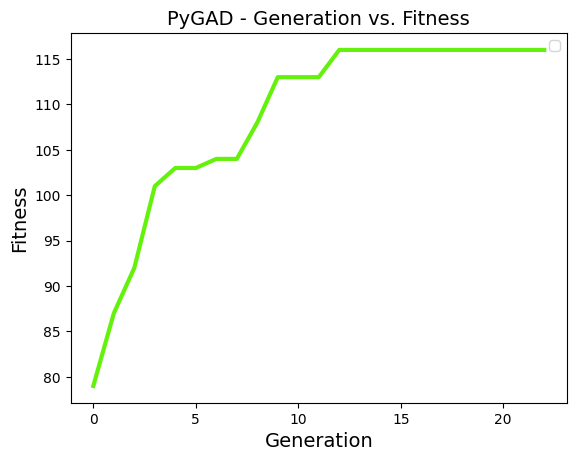

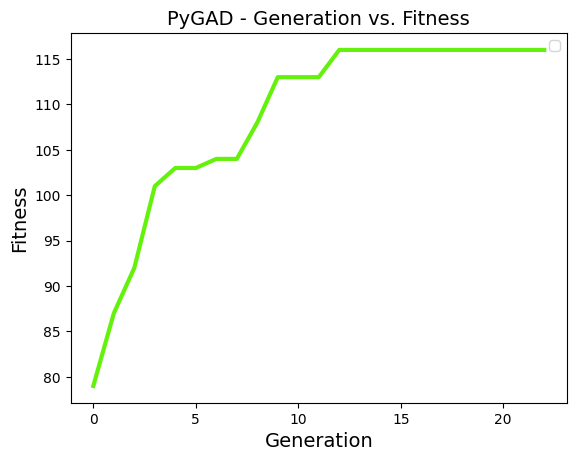

In [130]:
ga_instance.best_solution()
ga_instance.plot_fitness()